In [ ]:
!pip install autokeras

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

sns.set(style = 'darkgrid')
planets = sns.load_dataset('planets')

In [ ]:
planets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [ ]:
planets

#planets.shape
#planets.count()
#planets.info()
#planets.head()
#planets.describe() #데이터의 이상치가 상당히 크다

,method,number,orbital_period,mass,distance,year,orbital_period_log,distance_log
0,Radial Velocity,1,269.300000,7.10,77.40,2006,5.595826,4.348987
1,Radial Velocity,1,874.774000,2.21,56.95,2008,6.773966,4.042174
2,Radial Velocity,1,763.000000,2.60,19.84,2011,6.637258,2.987700
3,Radial Velocity,1,326.030000,19.40,110.62,2007,5.786989,4.706101
4,Radial Velocity,1,516.220000,10.50,119.47,2009,6.246533,4.783065
...,...,...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006,1.371563,5.147494
1031,Transit,1,2.615864,NaN,148.00,2007,0.961594,4.997212
1032,Transit,1,3.191524,NaN,174.00,2007,1.160499,5.159055
1033,Transit,1,4.125083,NaN,293.00,2008,1.417086,5.680173


In [ ]:
planets['method'].value_counts()

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density e

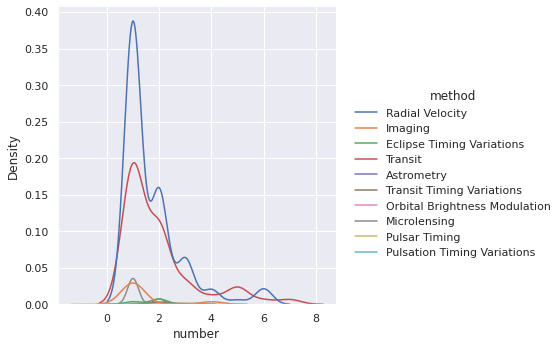

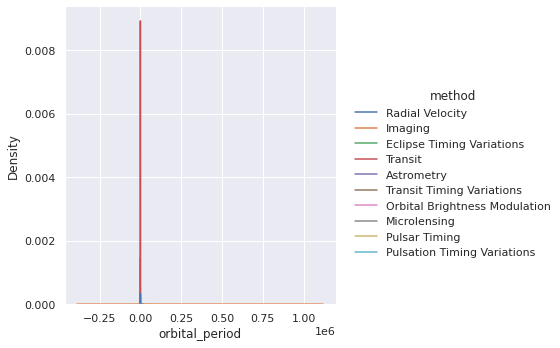

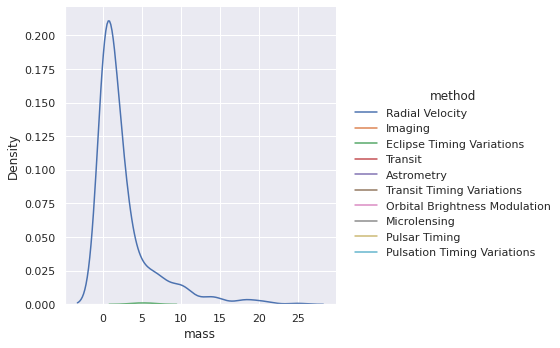

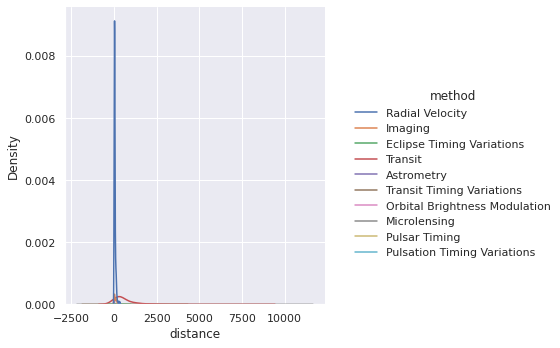

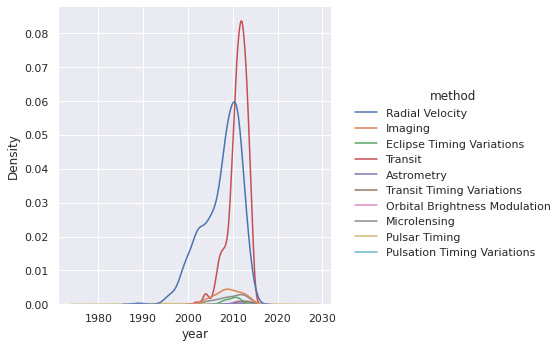

In [ ]:
planets['distance'] = np.log(planets['distance'])
planets['orbital_period'] = np.log(planets['orbital_period'])

c = planets.columns.tolist()
c.remove('method')

for e in c:
  sns.displot(data = planets, x = e, hue = 'method', kind = 'kde')

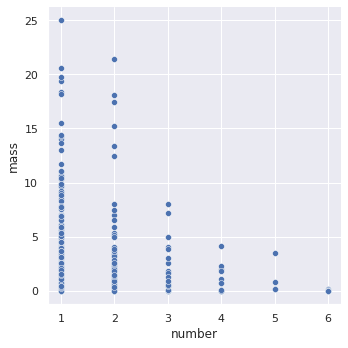

In [ ]:
#scattr plot

sns.relplot(data = planets, x = 'number', y = 'mass')

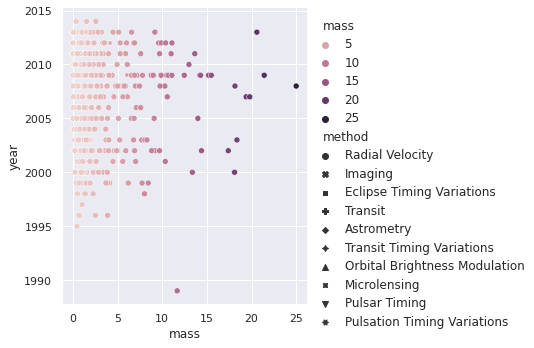

In [ ]:
sns.relplot(data = planets, x = 'mass', y = 'year', hue = 'mass', style = 'method')

In [ ]:
#단일 변수에 대해 시각화

sns.countplot(data = planets, x = 'mass')

Error in callback <function flush_figures at 0x7fb3d985f320> (for post_execute):


KeyboardInterrupt: ignored

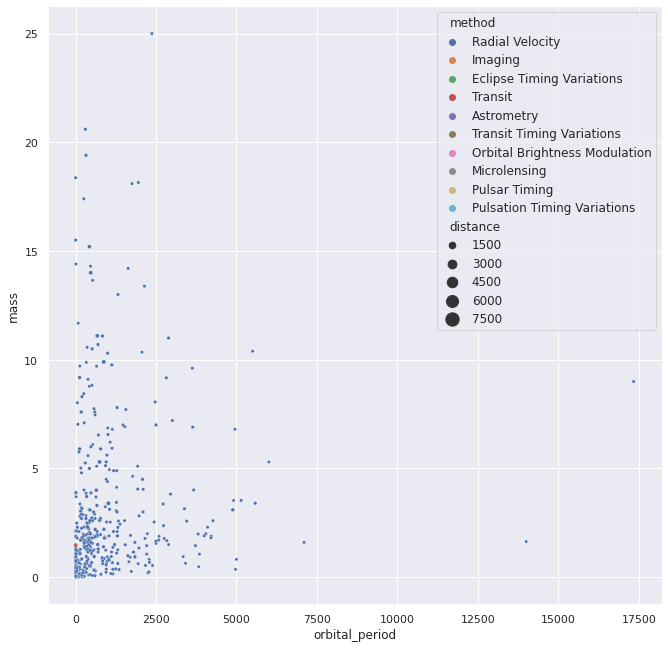

In [ ]:
sns.scatterplot(data = planets, x = 'orbital_period', y = 'mass', hue = 'method', size = 'distance', sizes = (10,200))

#상관 관계를 확인할 수 없었지만, 이상치를 확인할 수 있었다.

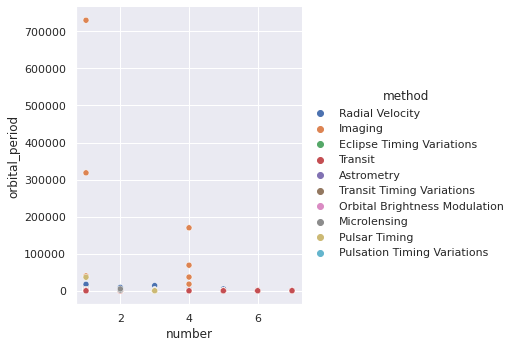

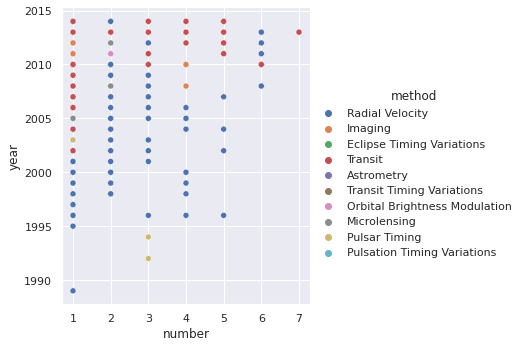

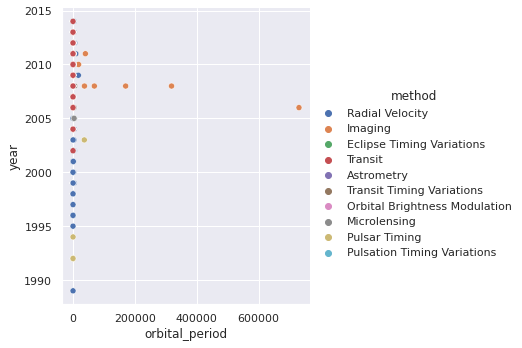

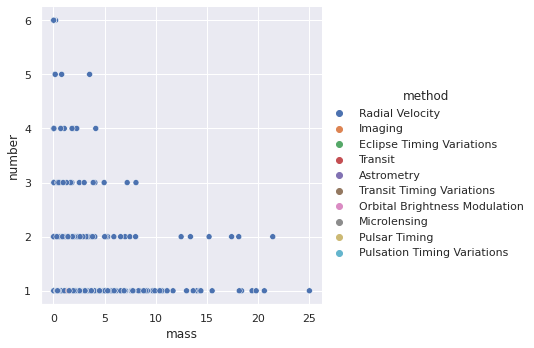

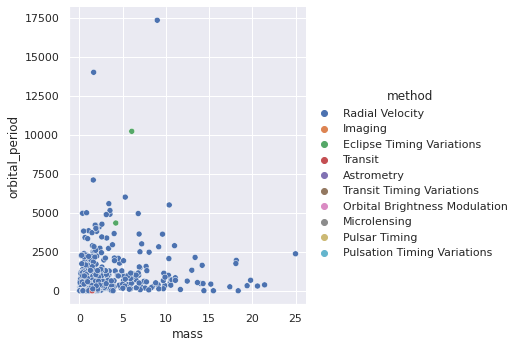

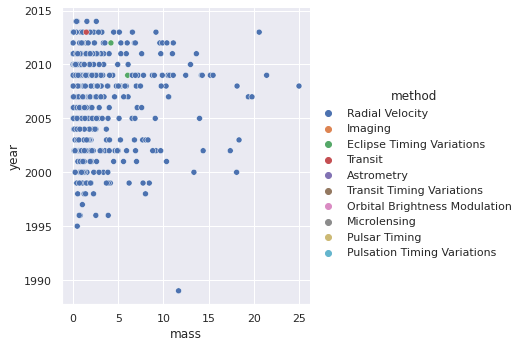

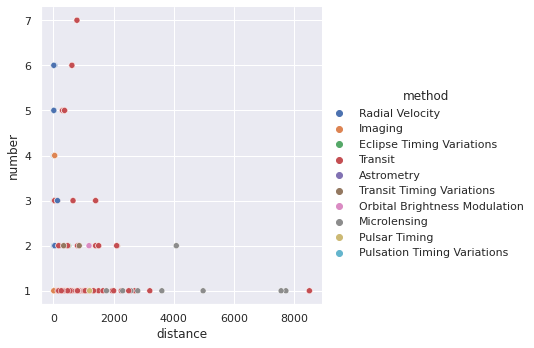

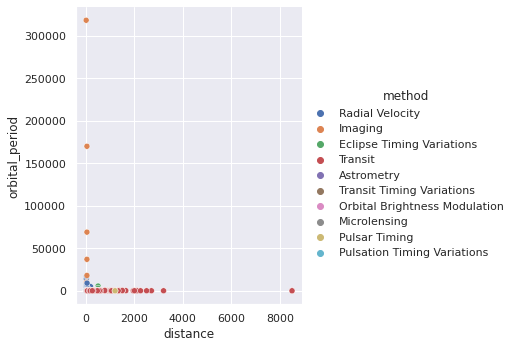

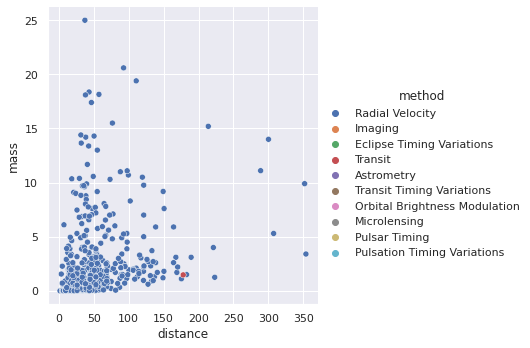

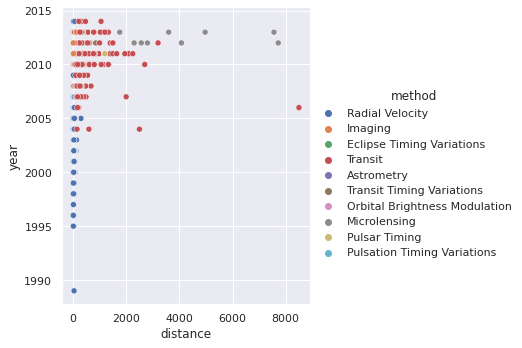

In [ ]:
sns.set(rc={'figure.figsize':(11,11)})

for e1 in c:
  for e2 in c:
    if e1 < e2:
      sns.relplot(data = planets, x = e1, y = e2, hue = 'method')

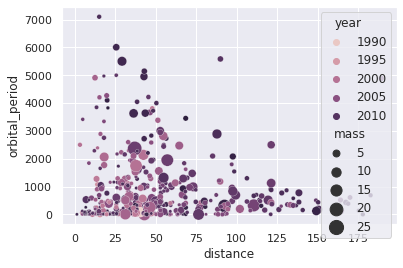

In [ ]:
zoom = planets[(planets['distance'] < 200) & (planets['orbital_period'] < 7500)]

sns.scatterplot(data = zoom, x = 'distance', y = 'orbital_period', hue = 'year', size = 'mass', sizes = (10,200))

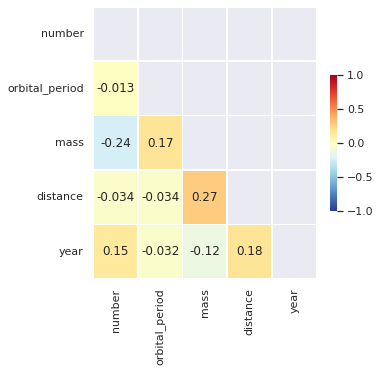

In [ ]:
#df = planets[['distance', 'orbital_period', 'mass']].corr()
df = planets.corr()

fig, ax = plt.subplots( figsize=(5,5) )

mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df, 
            cmap = 'RdYlBu_r', 
            annot = True,   
            mask=mask,      
            linewidths=.5,  
            cbar_kws={"shrink": .5},
            vmin = -1,vmax = 1  
           )  
plt.show()

In [ ]:
#피어슨 상관 계수를 통해 상관 관계에 대해 corelation 값을 얻을 수 있다.

planets[['distance', 'orbital_period']].corr()
#planets[['mass', 'orbital_period']].corr()
#planets[['mass', 'distance']].corr()

#거의 무시될 수 있는 선형 관계

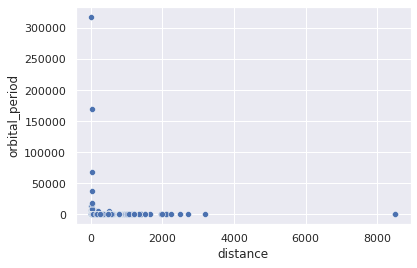

In [ ]:
sns.scatterplot(data = planets, x = 'distance', y = 'orbital_period')

In [ ]:
planets[planets['distance'] > 8000]

# distance가 굉장히 큰 값인 이상치가 있어서 시각화를 통해 봤더니 mass NaN 과 같은 결측치가 있었다.

,method,number,orbital_period,mass,distance,year
951,Transit,1,4.200,NaN,8500.0,2006
952,Transit,1,1.796,NaN,8500.0,2006


In [ ]:
planets[planets['orbital_period'] > 300000]

,method,number,orbital_period,mass,distance,year
68,Imaging,1,318280.0,NaN,7.69,2008
937,Imaging,1,730000.0,NaN,NaN,2006


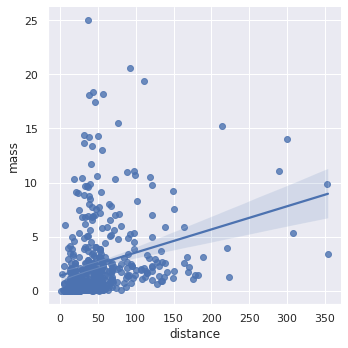

In [ ]:
sns.lmplot(data = planets, x = 'distance', y = 'mass')

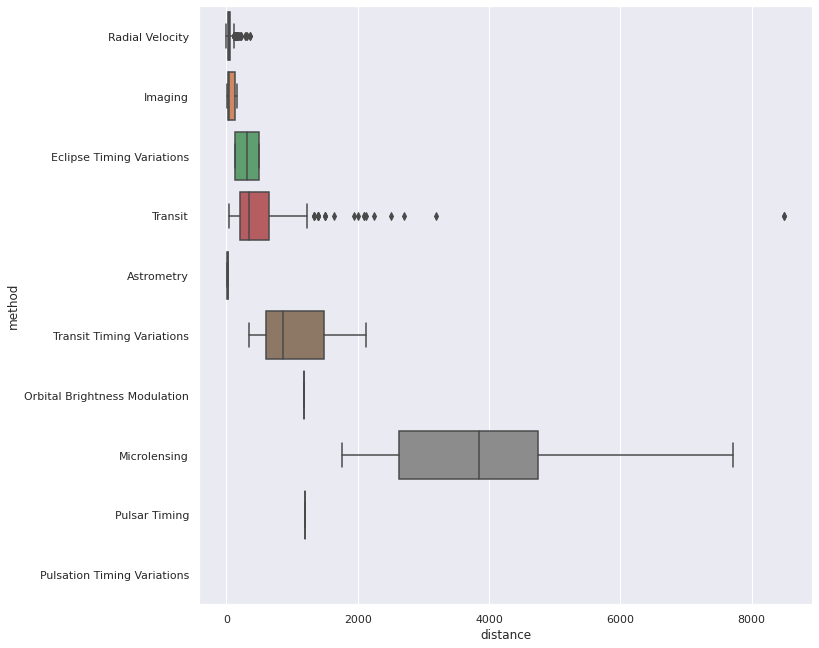

In [ ]:
planets['distance_log'] = np.log(planets['distance'])
sns.boxplot(data = planets, x = 'distance', y = 'method')
#sns.boxplot(data = planets, x = 'distance_log', y = 'method')

#distance 에 이상치가 존재하여 log 를 이용하여 x scale을 보정

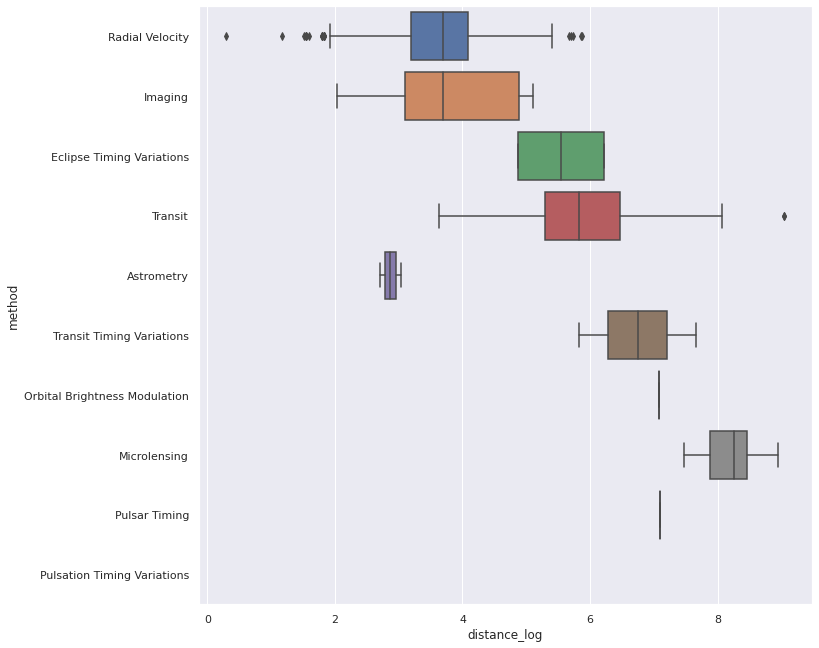

In [ ]:
planets['distance_log'] = np.log(planets['distance'])
sns.boxplot(data = planets, x = 'distance_log', y = 'method')

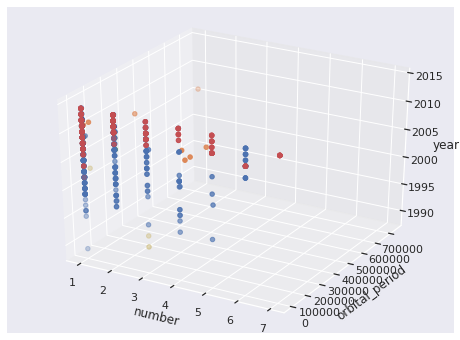

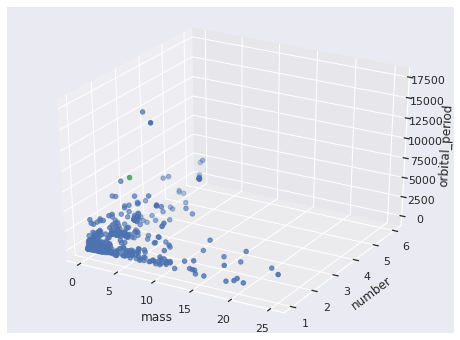

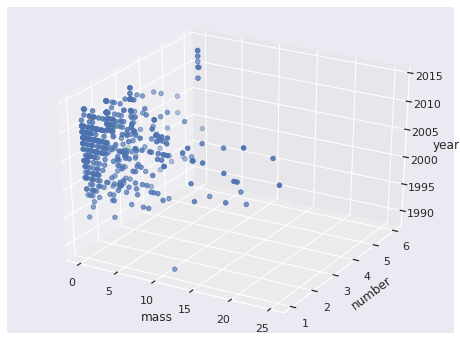

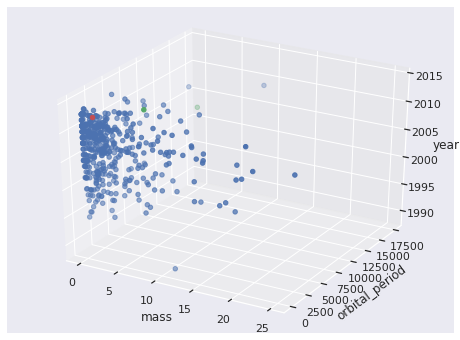

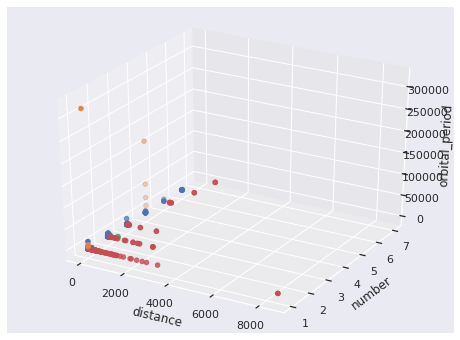

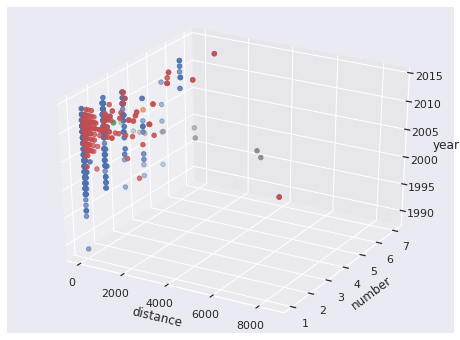

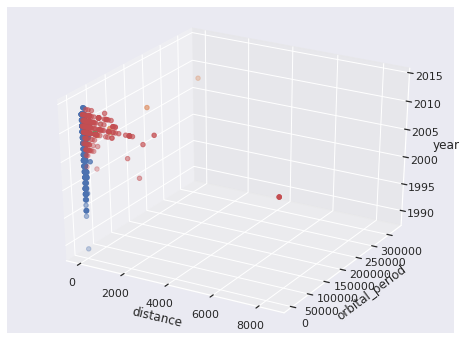

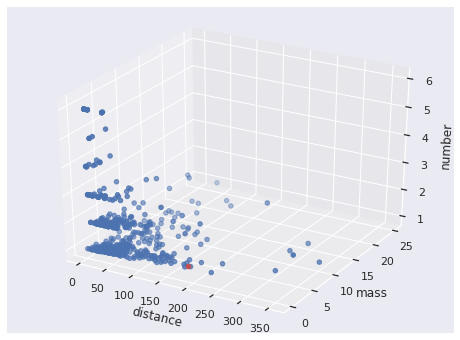

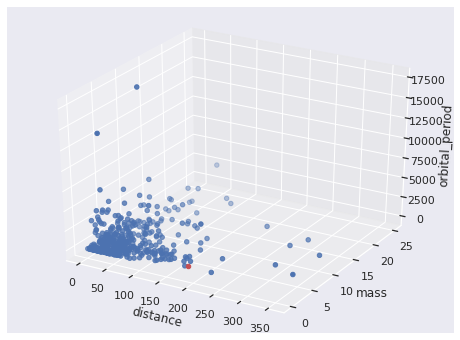

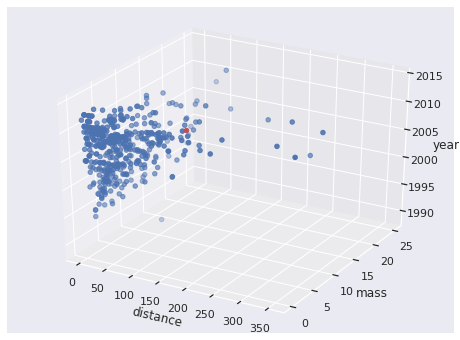

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

s = pd.unique(planets['method'])

for e1 in c :
    for e2 in c :
        for e3 in c :
            if (e1 < e2) and (e2 < e3) :
                fig = plt.figure(figsize=(8,6))
                ax = fig.add_subplot(111, projection = '3d')
                for d in s :
                    tmp = planets[planets['method']==d]
                    ax.scatter(tmp[e1], tmp[e2], tmp[e3])
                    ax.set_xlabel(e1)
                    ax.set_ylabel(e2)
                    ax.set_zlabel(e3)
                plt.show()

In [ ]:
import tensorflow as tf
import autokeras as ak

from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

In [ ]:
x_ = planets.iloc[:, 1:6]
y_ = planets.iloc[:, 0]

x_ = x_.interpolate()
y_ = y_.interpolate()

x_train_res, y_train_res = RandomOverSampler().fit_resample(x_, y_)

y_train_res

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


array(['Radial Velocity', 'Radial Velocity', 'Radial Velocity', ...,
       'Transit Timing Variations', 'Transit Timing Variations',
       'Transit Timing Variations'], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train_res, y_train_res, test_size = 0.25, shuffle = True)

x_train, y_train

(array([[1.00000000e+00, 7.30701886e+02, 1.54000000e+00, 4.97000000e+03,
         2.01300000e+03],
        [1.00000000e+00, 1.01600000e+03, 1.05000000e+00, 1.49800000e+01,
         2.01000000e+03],
        [1.00000000e+00, 5.98782500e+03, 3.75300000e+00, 5.24000000e+01,
         2.00400000e+03],
        ...,
        [1.00000000e+00, 6.40300000e+00, 2.30000000e-01, 4.31200000e+01,
         2.00200000e+03],
        [7.00000000e+00, 8.71937500e+00, 6.06215504e+00, 7.80000000e+02,
         2.01300000e+03],
        [1.00000000e+00, 1.17000000e+03, 1.54000000e+00, 3.92000000e+02,
         2.00700000e+03]]),
 array(['Microlensing', 'Astrometry', 'Imaging', ..., 'Radial Velocity',
        'Transit', 'Pulsation Timing Variations'], dtype=object))

In [ ]:
clf = ak.StructuredDataClassifier(
    overwrite=True, max_trials=5
)

early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=5)

clf.fit(
    x_train, y_train,
    epochs=200,
    callbacks=[early_stopping, reduce_lr],
)

In [ ]:
clf.fit(
    x_train, y_train,
    epochs=1000,
)

Trial 3 Complete [00h 00m 05s]
val_accuracy: 0.3391812741756439

Best val_accuracy So Far: 0.35087719559669495
Total elapsed time: 00h 00m 14s
INFO:tensorflow:Oracle triggered exit
Epoch 1/1000
33/33 [==============================] - 1s 4ms/step - loss: 2.1692 - accuracy: 0.3710
Epoch 2/1000
33/33 [==============================] - 0s 4ms/step - loss: 1.6947 - accuracy: 0.5343
Epoch 3/1000
33/33 [==============================] - 0s 4ms/step - loss: 1.2634 - accuracy: 0.5507
Epoch 4/1000
33/33 [==============================] - 0s 5ms/step - loss: 1.0138 - accuracy: 0.6406
Epoch 5/1000
33/33 [==============================] - 0s 4ms/step - loss: 0.9250 - accuracy: 0.6338
Epoch 6/1000
33/33 [==============================] - 0s 4ms/step - loss: 0.8821 - accuracy: 0.6493
Epoch 7/1000
33/33 [==============================] - 0s 4ms/step - loss: 0.8505 - accuracy: 0.6599
Epoch 8/1000
33/33 [==============================] - 0s 4ms/step - loss: 0.8245 - accuracy: 0.6657
Epoch 9/1000
33/33 

In [ ]:
model = clf.export_model()
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 5)]               0         
_________________________________________________________________
multi_category_encoding (Mul (None, 5)                 0         
_________________________________________________________________
normalization (Normalization (None, 5)                 11        
_________________________________________________________________
dense (Dense)                (None, 32)                192       
_________________________________________________________________
re_lu (ReLU)                 (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 64)                0     